In [3]:
from yahoo_fin.stock_info import get_data
from yahoo_fin import options
from pandas_datareader import data
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm
from datetime import datetime
from datetime import date

In [4]:
# Download from YahooFinance
AMZN_df = yf.download('AMZN', 
                      start='2020-09-01', 
                      end='2020-09-24', 
                      progress=False)
AMZN_df.tail()
SPY_df = yf.download('SPY', 
                      start='2020-09-01', 
                      end='2020-09-24', 
                      progress=False)
SPY_df.tail()
VIX_df = yf.download('^VIX', 
                      start='2020-09-01', 
                      end='2020-09-24', 
                      progress=False)

# Given a list of assets, this function returns a dataframe of adjusted close price indexed by time
def get_assets_adj_price(assets, start= None, end = None, partition = "1d"):
    if not assets:
        return None
    DF = get_data(assets[0], start_date = start, end_date = end, index_as_date = True, interval = partition)[["adjclose"]].rename(columns = {"adjclose": assets[0]})
    for x in assets[1:]:
        temp = get_data(x, start_date = start, end_date = end, index_as_date = True, interval = partition)[["adjclose"]].rename(columns = {"adjclose": x})
        DF = pd.concat([DF, temp], axis=1, join='inner')
    return DF
get_assets_adj_price(["AMZN", "SPY", "^VIX"])

,AMZN,SPY,^VIX
1997-05-15,1.958333,55.209023,19.910000
1997-05-16,1.729167,54.452469,21.570000
1997-05-19,1.708333,54.616070,21.480000
1997-05-20,1.635417,55.270378,19.260000
1997-05-21,1.427083,55.147728,19.280001
...,...,...,...
2020-09-21,2960.469971,326.970001,27.780001
2020-09-22,3128.989990,330.299988,26.860001
2020-09-23,2999.860107,322.640015,28.580000
2020-09-24,3019.790039,323.500000,28.510000


In [45]:
# Downloaded on Sep 23rd 2020 AND NEVER RERUN THIS 
AMZN = yf.Ticker("AMZN")
SPY = yf.Ticker("SPY")
VIX = yf.Ticker("^VIX")
SPY.options
AMZN.options
VIX.options
DATA1_AMZN = AMZN.option_chain('2020-10-22')
T1_AMZN = (datetime(2020,10,22) - datetime.today()).days/365
DATA1_SPY = SPY.option_chain("2020-10-22")
T1_SPY = (datetime(2020,10,22) - datetime.today()).days/365
DATA1_VIX = VIX.option_chain("2020-10-27")
T1_VIX = (datetime(2020,10,22) - datetime.today()).days/365
# VIX.options
rf = 0.09 * 0.01
DATA1_AMZN.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AMZN201023P01900000,2020-09-21 04:08:22,1900.0,2.64,0.85,1.89,0.00,0.000000,NaN,8,0.663333,False,REGULAR,USD
1,AMZN201023P01920000,2020-09-21 04:08:23,1920.0,2.00,0.76,2.08,0.00,0.000000,NaN,3,0.652469,False,REGULAR,USD
2,AMZN201023P01950000,2020-09-21 04:08:24,1950.0,2.30,0.82,2.36,0.00,0.000000,NaN,1,0.641239,False,REGULAR,USD
3,AMZN201023P01990000,2020-09-21 04:08:26,1990.0,3.10,1.00,2.92,0.00,0.000000,NaN,1,0.631229,False,REGULAR,USD
4,AMZN201023P02000000,2020-09-23 13:59:47,2000.0,1.45,1.24,2.86,-0.03,-2.027025,10.0,11,0.628117,False,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,AMZN201023P03600000,2020-09-16 14:17:47,3600.0,492.80,610.30,618.00,0.00,0.000000,2.0,32,0.485380,True,REGULAR,USD
164,AMZN201023P03700000,2020-09-10 14:09:17,3700.0,432.10,703.75,713.15,0.00,0.000000,4.0,5,0.504277,True,REGULAR,USD
165,AMZN201023P03800000,2020-09-09 19:26:42,3800.0,547.88,800.60,809.15,0.00,0.000000,2.0,4,0.519338,True,REGULAR,USD
166,AMZN201023P03950000,2020-09-11 13:30:23,3950.0,750.90,945.45,955.35,0.00,0.000000,1.0,1,0.545216,True,REGULAR,USD


In [47]:
# Download on Sep 24rd 2020, DO NOT RERUN THIS
AMZN2 = yf.Ticker("AMZN")
SPY2 = yf.Ticker("SPY")
VIX2 = yf.Ticker("^VIX")
SPY2.options
AMZN2.options
VIX2.options
DATA2_AMZN = AMZN2.option_chain('2020-10-22')
DATA2_SPY = SPY2.option_chain("2020-10-22")
DATA2_VIX = VIX2.option_chain("2020-10-27")

In [13]:
# Downloaded on Sep 25rd 2020 AND NEVER RERUN THIS for plotting 
AMZN = yf.Ticker("AMZN")
SPY = yf.Ticker("SPY")
VIX = yf.Ticker("^VIX")
SPY.options
AMZN.options
VIX.options
DATA3_AMZN1 = AMZN.option_chain('2020-10-22')
T3_AMZN1 = (datetime(2020,10,22) - datetime.today()).days/365
DATA3_AMZN2 = AMZN.option_chain('2020-11-19')
T3_AMZN2 = (datetime(2020,11,19) - datetime.today()).days/365
DATA3_AMZN3 = AMZN.option_chain('2020-12-17')
T3_AMZN3 = (datetime(2020,12,17) - datetime.today()).days/365
DATA3_SPY1 = SPY.option_chain("2020-10-15")
T3_SPY1 = (datetime(2020,10,15) - datetime.today()).days/365
DATA3_SPY2 = SPY.option_chain("2020-11-19")
T3_SPY2 = (datetime(2020,11,19) - datetime.today()).days/365
DATA3_SPY3 = SPY.option_chain("2020-12-30")
T3_SPY3 = (datetime(2020,12,30) - datetime.today()).days/365
DATA3_VIX = VIX.option_chain("2020-10-27")
T3_VIX = (datetime(2020,10,22) - datetime.today()).days/365
# VIX.options
rf = 0.09 * 0.01
DATA3_AMZN.puts

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AMZN201023P01740000,2020-09-25 18:32:26,1740.0,0.39,0.00,0.70,0.39,NaN,63.0,1,0.740237,False,REGULAR,USD
1,AMZN201023P01750000,2020-09-25 18:48:31,1750.0,0.33,0.00,0.74,0.33,NaN,61.0,0,0.737307,False,REGULAR,USD
2,AMZN201023P01760000,2020-09-25 18:23:27,1760.0,1.03,0.00,1.01,1.03,NaN,30.0,0,0.753420,False,REGULAR,USD
3,AMZN201023P01770000,2020-09-25 18:23:27,1770.0,1.06,0.00,1.02,1.06,NaN,30.0,0,0.747073,False,REGULAR,USD
4,AMZN201023P01780000,2020-09-25 18:23:27,1780.0,1.11,0.25,1.04,1.11,NaN,30.0,0,0.758303,False,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,AMZN201023P03650000,2020-09-25 19:13:45,3650.0,581.06,570.90,578.50,581.06,NaN,5.0,5,0.483617,True,REGULAR,USD
197,AMZN201023P03700000,2020-09-10 14:09:17,3700.0,432.10,617.40,624.90,0.00,0.0,4.0,5,0.489034,True,REGULAR,USD
198,AMZN201023P03800000,2020-09-09 19:26:42,3800.0,547.88,712.15,720.55,0.00,0.0,2.0,4,0.509450,True,REGULAR,USD
199,AMZN201023P03950000,2020-09-11 13:30:23,3950.0,750.90,857.25,866.70,0.00,0.0,1.0,1,0.545598,True,REGULAR,USD


In [79]:
import scipy.stats as si
def vanilla_option(S, K, T, r, vol, option = 'call'):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: interest rate
    #sigma: volatility of underlying asset
    
    d1 = (np.log(S/K)+(0.5 * vol**2 + r)*T)/(vol*np.sqrt(T)) 
    d2 = d1 - vol * np.sqrt(T)
    
    if option == 'call':
        result = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    if option == 'put':
        result = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))
    return result
def vega(S,K,T,r,vol):
    d1 = (np.log(S/K)+(0.5 * vol**2 + r)*T)/(vol*np.sqrt(T))
    return S * si.norm.cdf(d1, 0, 1) * np.sqrt(T)
def bisection(x1,x2,f, times = 10000):
    """
    Assumption: f(x) is continous and start with x1 and x2 such that f(x1)*f(x2) < 0
    With the starting interval [x1, x2], we check if the mid point x0 = (x1+x2)/2 is the root
    To determine the next interval [x3, x4], if f(x0)*f(x1) <0 then [x0, x1] becomes the new interval and repeat
    Tolarance = 10^-6
    """
    error = pow(10, -6)
    if f(x1)*f(x2) > 0:
        print("Bad Input, please rechoose x1 and x2.")
        return None
    x0 = 0.5*(x1 + x2)
    counter  = 1
    while abs(f(x0)) > error:
        if f(x1)*f(x0) < 0:
            x2 = x0    
        else:
            x1 = x0
        counter += 1
        x0 = 0.5*(x1 + x2)
        if counter > times:
            print("So many iterations, over ",times, ".")
            return None
    return x0

def newton(f, df, x0, times = 100000):
    """
    Finding root using linear approximation
    At any point in f(x), we have df/dx = f(x)' = (f(x+a) - f(x))/a
    f(x) = (x-a)*f(a)' + f(a) 
    when x is the root x0, we have 0 = (x0-a)*f(a)' + f(a)
    newton's method converge fast but not nessarily gives you an answer
    """
    xn = x0
    error = pow(10, -6)
    for n in range(0,times):
        fxn = f(xn)
        if abs(fxn) <= error:
            return xn
        dfxn = df(xn)
        if dfxn == 0:
            print("Zero derivative. Change your starting point.")
            return None
        xn = xn - fxn/dfxn
    print("So many iterations, over ",times, ".")
    return None

# A testing equation for root finding
def f(x):
    return x**2 - 20
def df(x):
    return 2*x

bisection(0,10,f, times = 10000)    
newton(f, df, 100)

def get_IV(bid, ask, S0, K, T, r,type = "call", method = "Bisection"):
    option_price = 0.5 * (bid + ask)
    if type == "call" and method == "Bisection":
        def f(x):
            return vanilla_option(S0, K, T,r,x) - option_price
        return bisection(-0.1,1.5,f)
    elif type == "put" and method == "Bisection":
        def f(x):
            return vanilla_option(S0, K, T,r,x, option = "put") - option_price
        return bisection(-1,2,f)
    elif type == "call" and method == "Newton":
        def g(x):
            return vanilla_option(S0, K, T,r,x, option = "call") - option_price
        def dg(x):
            return vega(S0,K,T,r,x)
        return newton(g, dg, 0.3, times = 10000)
    elif type == "put" and method == "Newton":
        def g(x):
            return vanilla_option(S0, K, T,r,x, option = "put") - option_price
        def dg(x):
            return vega(S0,K,T,r,x)
        return newton(g, dg,0.3, times = 10000)
def put_call_parity(K, S, T,r, price, old_type= "call"):
    if old_type == "call":
        return K*np.exp(-r*T) + price - S
    elif old_type == "put":
        return price + S - K * np.exp(-r * T)

In [151]:
result2[["strike","Newton_IV","Maturity","Price","Actual_Price","Delta_Theory","Delta_Pratice","Gamma_Theory","Gamma_Pratice","Vega_Theory","Vega_Pratice" ]]

,strike,Newton_IV,Maturity,Price,Actual_Price,Delta_Theory,Delta_Pratice,Gamma_Theory,Gamma_Pratice,Vega_Theory,Vega_Pratice
78,2790.0,0.501853,0.068493,47.099999,47.100,-0.187645,108.196403,0.000690,0.0,158.684692,225.321658
79,2800.0,0.502031,0.068493,49.524999,49.525,-0.194820,110.760452,0.000708,0.0,164.913228,230.504621
80,2810.0,0.500023,0.068493,51.524999,51.525,-0.202553,113.441152,0.000725,0.0,170.571741,235.073056
81,2820.0,0.499201,0.068493,53.874999,53.875,-0.210240,116.019647,0.000743,0.0,176.734144,239.888723
82,2830.0,0.498360,0.068493,56.299999,56.300,-0.218133,118.581344,0.000761,0.0,183.014482,244.633331
...,...,...,...,...,...,...,...,...,...,...,...
139,3360.0,0.597619,0.221918,508.440030,443.450,-0.598521,281.270003,0.000553,0.0,816.064724,575.462418
140,3370.0,0.597356,0.221918,514.977523,450.175,-0.603658,280.279809,0.000551,0.0,822.242588,574.531034
141,3380.0,0.597046,0.221918,521.525861,456.925,-0.608798,279.238224,0.000550,0.0,828.418310,573.534568
142,3390.0,0.596465,0.221918,527.958469,463.600,-0.614088,278.112655,0.000548,0.0,834.691046,572.455436


In [149]:
result2["Delta_Theory"] = result2.apply(lambda row: Der_Delta(3095.129883,row["strike"],row["Maturity"],0.0009,row["impliedVolatility"], option = "put"), axis=1)
result2["Delta_Pratice"] = result2.apply(lambda row:Pra_Delta(3095.129883,row["strike"],row["Maturity"],0.0009,row["impliedVolatility"], option = "put"), axis=1)
result2["Gamma_Theory"] = result2.apply(lambda row: Der_Gamma(3095.129883,row["strike"],row["Maturity"],0.0009,row["impliedVolatility"]), axis=1)
result2["Gamma_Pratice"] = result2.apply(lambda row:Pra_Gamma(3095.129883,row["strike"],row["Maturity"],0.0009,row["impliedVolatility"]), axis=1)
result2["Vega_Theory"] = result2.apply(lambda row: Vega(3095.129883,row["strike"],row["Maturity"],0.0009,row["Newton_IV"]), axis=1)
result2["Vega_Pratice"] = result2.apply(lambda row:Pra_Vega(3095.129883,row["strike"],row["Maturity"],0.0009,row["Newton_IV"]), axis=1)

In [145]:
result["Price"] = result.apply(lambda row:vanilla_option(3095.129883,row["strike"],row["Maturity"],0.0009,row["Newton_IV"], option = 'call'), axis=1)
result2["Price"] = result2.apply(lambda row:vanilla_option(3095.129883,row["strike"],row["Maturity"],0.0009,row["Newton_IV"], option = 'put'), axis=1)
result2

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Bisection_IV,Newton_IV,Maturity,Price
78,AMZN201023P02790000,2020-09-25 17:46:30,2790.0,54.53,45.25,48.95,-16.050003,-22.740156,2.0,124,0.481824,False,REGULAR,USD,0.501853,0.501853,0.068493,47.099999
79,AMZN201023P02800000,2020-09-25 19:49:37,2800.0,50.00,48.00,51.05,-24.500000,-32.885906,52.0,418,0.480489,False,REGULAR,USD,0.502031,0.502031,0.068493,49.524999
80,AMZN201023P02810000,2020-09-24 18:29:40,2810.0,74.25,49.60,53.45,0.000000,0.000000,1.0,16,0.480070,False,REGULAR,USD,0.500023,0.500023,0.068493,51.524999
81,AMZN201023P02820000,2020-09-25 19:35:51,2820.0,56.16,51.95,55.80,-23.619999,-29.606417,1.0,28,0.479131,False,REGULAR,USD,0.499201,0.499201,0.068493,53.874999
82,AMZN201023P02830000,2020-09-23 18:33:14,2830.0,83.60,54.35,58.25,0.000000,0.000000,1.0,6,0.478284,False,REGULAR,USD,0.498360,0.498360,0.068493,56.299999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,AMZN201218P03360000,2020-09-22 14:06:47,3360.0,484.20,440.35,446.55,0.000000,0.000000,4.0,17,0.479665,True,REGULAR,USD,0.597619,0.597619,0.221918,508.440030
140,AMZN201218P03370000,2020-09-24 14:51:46,3370.0,504.33,447.05,453.30,0.000000,0.000000,1.0,256,0.479513,True,REGULAR,USD,0.597356,0.597356,0.221918,514.977523
141,AMZN201218P03380000,2020-09-09 17:47:00,3380.0,417.41,453.80,460.05,0.000000,0.000000,1.0,23,0.479280,True,REGULAR,USD,0.597046,0.597046,0.221918,521.525861
142,AMZN201218P03390000,2020-09-14 17:50:12,3390.0,450.21,460.60,466.60,0.000000,0.000000,5.0,45,0.478612,True,REGULAR,USD,0.596465,0.596465,0.221918,527.958469


In [147]:
result["Actual_Price"] = 0.5 * (result["bid"] + result["ask"])
result2["Actual_Price"] = 0.5 * (result2["bid"] + result2["ask"])

In [129]:
import math
def Der_Delta(S,K,T,r,vol, option = "call"):
    d1 = (np.log(S/K) + T*(r + 0.5*vol**2))/(vol*np.sqrt(T))
    if option == "put":
        return si.norm.cdf(d1, 0.0, 1.0)-1
    elif option == "call":
        return si.norm.cdf(d1, 0.0, 1.0)
    
def Der_Gamma(S,K,T,r,vol):
    d1 = (np.log(S/K) + T*(r + 0.5*vol**2))/(vol*np.sqrt(T))
    return np.exp(-d1**2/2)/(np.sqrt(2*math.pi*T)*S*vol)

def Vega(S,K,T,r,vol):
    d1 = (np.log(S/K)+(0.5 * vol**2 + r)*T)/(vol*np.sqrt(T))
    return S * si.norm.cdf(-d1, 0, 1) * np.sqrt(T)

def Pra_Vega(S,K,T,r,vol):
    Price_new = vanilla_option(S, K, T, r, vol+0.01, option = 'call')
    return (Price_new - vanilla_option(S, K, T, r, vol, option = 'call')) / 0.01    

def Pra_Delta(S,K,T,r,vol, option = "call"):
    S_new = S + 0.01
    if option == "call":
        Price_new = vanilla_option(S_new, K, T, r, vol, option = 'call')
        return (Price_new - vanilla_option(S, K, T, r, vol, option = 'call'))/0.01
    elif option == "put":
        Price_new = vanilla_option(S_new, K, T, r, vol, option = 'put')
        return (Price_new - vanilla_option(S, K, T, r, vol-0.01, option = 'put'))/0.02
    
def Pra_Gamma(S,K,T,r,vol, option = "call"):
    if option == "call":
        return (pra_Delta(S+0.01,K,T,r,vol, option = "call") - pra_Delta(S+0.01,K,T,r,vol, option = "call"))/0.01
    elif option == "put":
        return (pra_Delta(S+0.01,K,T,r,vol, option = "put") - pra_Delta(S+0.01,K,T,r,vol, option = "put")) * 100   

In [171]:
# Delete Options with NaN volatility: Not traded
DATA1_AMZN_puts = DATA1_AMZN.puts.dropna()
DATA1_AMZN_calls = DATA1_AMZN.calls.dropna()
DATA1_SPY_puts = DATA1_SPY.puts.dropna()
DATA1_SPY_calls = DATA1_SPY.calls.dropna()
DATA2_AMZN_puts = DATA2_AMZN.puts.dropna()
DATA2_AMZN_calls = DATA2_AMZN.calls.dropna()
DATA2_SPY_puts = DATA2_SPY.puts.dropna()
DATA2_SPY_calls = DATA2_SPY.calls.dropna()

In [17]:
# Delete Options with NaN volatility: Not traded
DATA3_AMZN1_puts = DATA3_AMZN1.puts.dropna()
DATA3_AMZN1_calls = DATA3_AMZN1.calls.dropna()
DATA3_SPY1_puts = DATA3_SPY1.puts.dropna()
DATA3_SPY1_calls = DATA3_SPY1.calls.dropna()
DATA3_AMZN2_puts = DATA3_AMZN2.puts.dropna()
DATA3_AMZN2_calls = DATA3_AMZN2.calls.dropna()
DATA3_SPY2_puts = DATA3_SPY2.puts.dropna()
DATA3_SPY2_calls = DATA3_SPY2.calls.dropna()
DATA3_AMZN3_puts = DATA3_AMZN3.puts.dropna()
DATA3_AMZN3_calls = DATA3_AMZN3.calls.dropna()
DATA3_SPY3_puts = DATA3_SPY3.puts.dropna()
DATA3_SPY3_calls = DATA3_SPY3.calls.dropna()

In [168]:
# Get the Chain of at the money options:
# Stock Price is 3095.129883, taking ratio [0.9, 1.1], the upper and lower bound of Strike Price should be [2785.62,3404.64]
DATA3_AMZN1_puts = DATA3_AMZN1_puts[DATA3_AMZN1_puts["strike"] >= 2785.62]
DATA3_AMZN1_puts = DATA3_AMZN1_puts[DATA3_AMZN1_puts["strike"] <= 3404.64]
DATA3_AMZN1_calls = DATA3_AMZN1_calls[DATA3_AMZN1_calls["strike"] >= 2785.62]
DATA3_AMZN1_calls = DATA3_AMZN1_calls[DATA3_AMZN1_calls["strike"] <= 3404.64] 
DATA3_AMZN2_puts = DATA3_AMZN2_puts[DATA3_AMZN2_puts["strike"] >= 2785.62]
DATA3_AMZN2_puts = DATA3_AMZN2_puts[DATA3_AMZN2_puts["strike"] <= 3404.64]
DATA3_AMZN2_calls = DATA3_AMZN2_calls[DATA3_AMZN2_calls["strike"] >= 2785.62]
DATA3_AMZN2_calls = DATA3_AMZN2_calls[DATA3_AMZN2_calls["strike"] <= 3404.64] 
DATA3_AMZN3_puts = DATA3_AMZN3_puts[DATA3_AMZN3_puts["strike"] >= 2785.62]
DATA3_AMZN3_puts = DATA3_AMZN3_puts[DATA3_AMZN3_puts["strike"] <= 3404.64]
DATA3_AMZN3_calls = DATA3_AMZN3_calls[DATA3_AMZN3_calls["strike"] >= 2785.62]
DATA3_AMZN3_calls = DATA3_AMZN3_calls[DATA3_AMZN3_calls["strike"] <= 3404.64]
# SPY is 328.730011, taking ratio [0.95, 1.05], the upper and lower bound shoud be [312.29, 345.17] for at the money options
DATA3_SPY1_puts = DATA3_SPY1_puts[DATA3_SPY1_puts["strike"] >= 312.29]
DATA3_SPY1_puts = DATA3_SPY1_puts[DATA3_SPY1_puts["strike"] <= 345.17]
DATA3_SPY1_calls = DATA3_SPY1_calls[DATA3_SPY1_calls["strike"] >= 312.29]
DATA3_SPY1_calls = DATA3_SPY1_calls[DATA3_SPY1_calls["strike"] <= 345.17] 
DATA3_SPY2_puts = DATA3_SPY2_puts[DATA3_SPY2_puts["strike"] >= 312.29]
DATA3_SPY2_puts = DATA3_SPY2_puts[DATA3_SPY2_puts["strike"] <= 345.17]
DATA3_SPY2_calls = DATA3_SPY2_calls[DATA3_SPY2_calls["strike"] >= 312.29]
DATA3_SPY2_calls = DATA3_SPY2_calls[DATA3_SPY2_calls["strike"] <= 345.17] 
DATA3_SPY3_puts = DATA3_SPY3_puts[DATA3_SPY3_puts["strike"] >= 312.29]
DATA3_SPY3_puts = DATA3_SPY3_puts[DATA3_SPY3_puts["strike"] <= 345.17]
DATA3_SPY3_calls = DATA3_SPY3_calls[DATA3_SPY3_calls["strike"] >= 312.29]
DATA3_SPY3_calls = DATA3_SPY3_calls[DATA3_SPY3_calls["strike"] <= 345.17] 
df_amzn1_data3_put = DATA3_AMZN1_puts
df_amzn1_data3_put["Bisection_IV"] = df_amzn1_data3_put.apply(lambda row: get_IV(row["bid"],row["ask"],3095.129883,row["strike"], T3_AMZN1, 0.0009,type = "put",method = "Bisection"), axis=1)
df_amzn1_data3_put["Newton_IV"] = df_amzn1_data3_put.apply(lambda row: get_IV(row["bid"],row["ask"],3095.129883,row["strike"], T3_AMZN1, 0.0009,type = "put",method = "Newton"), axis=1)
df_amzn1_data3_call = DATA3_AMZN1_calls
df_amzn1_data3_call["Bisection_IV"] = df_amzn1_data3_call.apply(lambda row: get_IV(row["bid"],row["ask"],3095.129883,row["strike"], T3_AMZN1, 0.0009,type = "call",method = "Bisection"), axis=1)
df_amzn1_data3_call["Newton_IV"] = df_amzn1_data3_call.apply(lambda row: get_IV(row["bid"],row["ask"],3095.129883,row["strike"], T3_AMZN1, 0.0009,type = "call",method = "Newton"), axis=1)

In [124]:
df_amzn2_data3_put = DATA3_AMZN2_puts
df_amzn2_data3_put["Bisection_IV"] = df_amzn2_data3_put.apply(lambda row: get_IV(row["bid"],row["ask"],3095.129883,row["strike"], T3_AMZN2, 0.0009,type = "put",method = "Bisection"), axis=1)
df_amzn2_data3_put["Newton_IV"] = df_amzn2_data3_put.apply(lambda row: get_IV(row["bid"],row["ask"],3095.129883,row["strike"], T3_AMZN2, 0.0009,type = "put",method = "Newton"), axis=1)
df_amzn2_data3_call = DATA3_AMZN2_calls
df_amzn2_data3_call["Bisection_IV"] = df_amzn2_data3_call.apply(lambda row: get_IV(row["bid"],row["ask"],3095.129883,row["strike"], T3_AMZN2, 0.0009,type = "call",method = "Bisection"), axis=1)
df_amzn2_data3_call["Newton_IV"] = df_amzn2_data3_call.apply(lambda row: get_IV(row["bid"],row["ask"],3095.129883,row["strike"], T3_AMZN2, 0.0009,type = "call",method = "Newton"), axis=1)
df_amzn3_data3_put = DATA3_AMZN3_puts
df_amzn3_data3_put["Bisection_IV"] = df_amzn3_data3_put.apply(lambda row: get_IV(row["bid"],row["ask"],3095.129883,row["strike"], T3_AMZN2, 0.0009,type = "put",method = "Bisection"), axis=1)
df_amzn3_data3_put["Newton_IV"] = df_amzn3_data3_put.apply(lambda row: get_IV(row["bid"],row["ask"],3095.129883,row["strike"], T3_AMZN2, 0.0009,type = "put",method = "Newton"), axis=1)
df_amzn3_data3_call = DATA3_AMZN3_calls
df_amzn3_data3_call["Bisection_IV"] = df_amzn3_data3_call.apply(lambda row: get_IV(row["bid"],row["ask"],3095.129883,row["strike"], T3_AMZN2, 0.0009,type = "call",method = "Bisection"), axis=1)
df_amzn3_data3_call["Newton_IV"] = df_amzn3_data3_call.apply(lambda row: get_IV(row["bid"],row["ask"],3095.129883,row["strike"], T3_AMZN2, 0.0009,type = "call",method = "Newton"), axis=1)

In [156]:
df_amzn_data1_put = DATA1_AMZN_puts
df_amzn_data1_put["Bisection_IV"] = df_amzn_data1_put.apply(lambda row: get_IV(row["bid"],row["ask"],2999.860107,row["strike"], T1_AMZN, 0.0009,type = "put",method = "Bisection"), axis=1)
df_amzn_data1_put["Newton_IV"] = df_amzn_data1_put.apply(lambda row: get_IV(row["bid"],row["ask"],2999.860107,row["strike"], T1_AMZN, 0.0009,type = "put",method = "Newton"), axis=1)
df_amzn_data1_call = DATA1_AMZN_calls
df_amzn_data1_call["Bisection_IV"] = df_amzn_data1_call.apply(lambda row: get_IV(row["bid"],row["ask"],2999.860107,row["strike"], T1_AMZN, 0.0009,type = "call",method = "Bisection"), axis=1)
df_amzn_data1_call["Newton_IV"] = df_amzn_data1_call.apply(lambda row: get_IV(row["bid"],row["ask"],2999.860107,row["strike"], T1_AMZN, 0.0009,type = "call",method = "Newton"), axis=1)

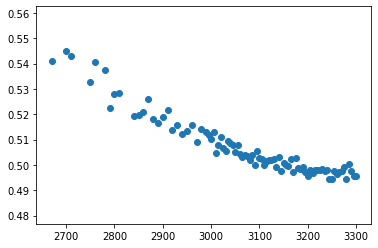

In [191]:
plt.scatter(df_amzn_data1_call['strike'], df_amzn_data1_call['Bisection_IV'])

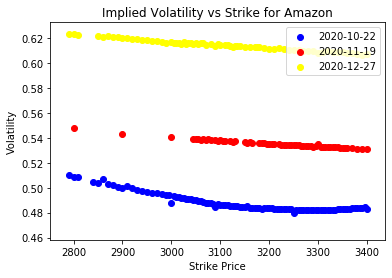

In [126]:
plt.scatter(df_amzn1_data3_call['strike'], df_amzn1_data3_call['Bisection_IV'], color = "blue", label = "2020-10-22")
plt.scatter(df_amzn2_data3_call['strike'], df_amzn2_data3_call['Bisection_IV'], color = "red", label = "2020-11-19")
plt.scatter(df_amzn3_data3_call['strike'], df_amzn3_data3_call['Bisection_IV'], color = "yellow", label = "2020-12-27")
plt.title("Implied Volatility vs Strike for Amazon")
plt.xlabel("Strike Price")
plt.ylabel("Volatility")
plt.legend(loc='upper right')
plt.show()

In [59]:
df_spy1_data3_call["Maturity"] = T3_SPY1
df_amzn2_data3_call["Maturity"] = T3_SPY2
df_amzn3_data3_call["Maturity"] = T3_SPY3
frames = [df_amzn1_data3_call,df_amzn2_data3_call,df_amzn3_data3_call]
result = pd.concat(frames)
result

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Bisection_IV,Newton_IV,Maturity
30,AMZN201023C02790000,2020-09-21 19:49:02,2790.0,244.83,350.10,358.50,0.000000,0.000000,6.0,12,0.499997,True,REGULAR,USD,0.510285,0.510285,0.068493
31,AMZN201023C02800000,2020-09-24 18:18:12,2800.0,310.00,342.35,350.40,0.000000,0.000000,2.0,16,0.497495,True,REGULAR,USD,0.508757,0.508757,0.068493
32,AMZN201023C02810000,2020-09-24 14:30:30,2810.0,291.67,334.85,342.90,0.000000,0.000000,1.0,9,0.497129,True,REGULAR,USD,0.508736,0.508736,0.068493
35,AMZN201023C02840000,2020-09-24 13:53:45,2840.0,271.53,311.80,320.00,0.000000,0.000000,2.0,4,0.492719,True,REGULAR,USD,0.504705,0.504705,0.068493
36,AMZN201023C02850000,2020-09-25 14:17:08,2850.0,254.55,304.70,312.35,-4.629990,-1.786399,1.0,52,0.490651,True,REGULAR,USD,0.503876,0.503876,0.068493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,AMZN201218C03360000,2020-09-24 16:25:23,3360.0,172.74,181.20,186.40,0.000000,0.000000,2.0,34,0.487729,False,REGULAR,USD,0.608082,0.608082,0.221918
113,AMZN201218C03370000,2020-09-22 13:33:55,3370.0,152.00,177.95,183.10,0.000000,0.000000,1.0,334,0.487514,False,REGULAR,USD,0.607851,0.607851,0.221918
114,AMZN201218C03380000,2020-09-22 14:35:08,3380.0,155.65,174.55,179.80,0.000000,0.000000,2.0,100,0.487218,False,REGULAR,USD,0.607353,0.607353,0.221918
115,AMZN201218C03390000,2020-09-22 13:36:00,3390.0,144.38,171.20,176.00,0.000000,0.000000,3.0,64,0.485967,False,REGULAR,USD,0.606256,0.606256,0.221918


In [143]:
df_amzn1_data3_put["Maturity"] = T3_AMZN1
df_amzn2_data3_put["Maturity"] = T3_AMZN2
df_amzn3_data3_put["Maturity"] = T3_AMZN3
frames = [df_amzn1_data3_put,df_amzn2_data3_put,df_amzn3_data3_put]
result2 = pd.concat(frames)
result2

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Bisection_IV,Newton_IV,Maturity
78,AMZN201023P02790000,2020-09-25 17:46:30,2790.0,54.53,45.25,48.95,-16.050003,-22.740156,2.0,124,0.481824,False,REGULAR,USD,0.501853,0.501853,0.068493
79,AMZN201023P02800000,2020-09-25 19:49:37,2800.0,50.00,48.00,51.05,-24.500000,-32.885906,52.0,418,0.480489,False,REGULAR,USD,0.502031,0.502031,0.068493
80,AMZN201023P02810000,2020-09-24 18:29:40,2810.0,74.25,49.60,53.45,0.000000,0.000000,1.0,16,0.480070,False,REGULAR,USD,0.500023,0.500023,0.068493
81,AMZN201023P02820000,2020-09-25 19:35:51,2820.0,56.16,51.95,55.80,-23.619999,-29.606417,1.0,28,0.479131,False,REGULAR,USD,0.499201,0.499201,0.068493
82,AMZN201023P02830000,2020-09-23 18:33:14,2830.0,83.60,54.35,58.25,0.000000,0.000000,1.0,6,0.478284,False,REGULAR,USD,0.498360,0.498360,0.068493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,AMZN201218P03360000,2020-09-22 14:06:47,3360.0,484.20,440.35,446.55,0.000000,0.000000,4.0,17,0.479665,True,REGULAR,USD,0.597619,0.597619,0.221918
140,AMZN201218P03370000,2020-09-24 14:51:46,3370.0,504.33,447.05,453.30,0.000000,0.000000,1.0,256,0.479513,True,REGULAR,USD,0.597356,0.597356,0.221918
141,AMZN201218P03380000,2020-09-09 17:47:00,3380.0,417.41,453.80,460.05,0.000000,0.000000,1.0,23,0.479280,True,REGULAR,USD,0.597046,0.597046,0.221918
142,AMZN201218P03390000,2020-09-14 17:50:12,3390.0,450.21,460.60,466.60,0.000000,0.000000,5.0,45,0.478612,True,REGULAR,USD,0.596465,0.596465,0.221918


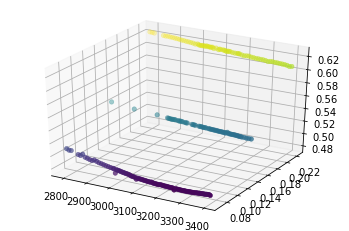

In [127]:
from mpl_toolkits import mplot3d
# fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.plot3D(result['strike'],result["Maturity"], result['Bisection_IV'], 'gray')
ax.scatter(result['strike'],result["Maturity"], result['Bisection_IV'], c= result['Bisection_IV'], cmap='viridis', linewidth=0.5)

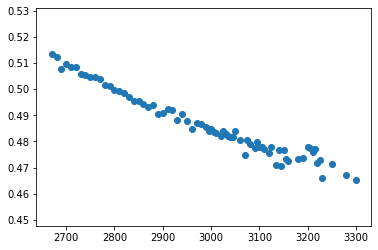

In [190]:
import matplotlib.pyplot as plt
plt.scatter(df_amzn_data1_put['strike'], df_amzn_data1_put['Bisection_IV'])
plt.show()

In [177]:
df_spy_data1_put = DATA1_SPY_puts
df_spy_data1_put["Bisection_IV"] = df_spy_data1_put.apply(lambda row: get_IV(row["bid"],row["ask"], 322.640015,row["strike"], T1_SPY, 0.0009,type = "put",method = "Bisection"), axis=1)
df_spy_data1_put["Newton_IV"] = df_spy_data1_put.apply(lambda row: get_IV(row["bid"],row["ask"], 322.640015,row["strike"], T1_SPY, 0.0009,type = "put",method = "Newton"), axis=1)
df_spy_data1_call = DATA1_SPY_calls
df_spy_data1_call["Bisection_IV"] = df_spy_data1_call.apply(lambda row: get_IV(row["bid"],row["ask"], 322.640015,row["strike"], T1_SPY, 0.0009,type = "call",method = "Bisection"), axis=1)
df_spy_data1_call["Newton_IV"] = df_spy_data1_call.apply(lambda row: get_IV(row["bid"],row["ask"], 322.640015,row["strike"], T1_SPY, 0.0009,type = "call",method = "Newton"), axis=1)

In [180]:
print("Average Implied Vol for SPY Put is ", df_spy_data1_put["Bisection_IV"].mean())
print("Average Implied Vol for SPY Call is ", df_spy_data1_call["Bisection_IV"].mean())
print("Average Implied Vol for AMZN Call is ", df_amzn_data1_put["Bisection_IV"].mean())
print("Average Implied Vol for AMZN Call is ", df_amzn_data1_call["Bisection_IV"].mean())

Average Implied Vol for SPY Put is  0.2459905528846909
Average Implied Vol for SPY Call is  0.26991940461672276
Average Implied Vol for AMZN Call is  0.48646873171913296
Average Implied Vol for AMZN Call is  0.5077058167293155


In [188]:
df_amzn_data1_put[["strike", "bid", "ask", "volume", "Bisection_IV", "Newton_IV"]]

,strike,bid,ask,volume,Bisection_IV,Newton_IV
49,2670.0,45.20,48.10,1.0,0.513410,0.513410
50,2680.0,47.20,50.20,14.0,0.512268,0.512268
51,2690.0,48.55,51.45,2.0,0.507597,0.507597
52,2700.0,51.45,54.35,15.0,0.509524,0.509524
53,2710.0,53.65,56.70,2.0,0.508446,0.508446
...,...,...,...,...,...,...
121,3225.0,296.35,301.75,2.0,0.472830,0.472830
122,3230.0,297.30,304.15,1.0,0.466009,0.466009
126,3250.0,313.80,320.60,3.0,0.471505,0.471505
128,3280.0,335.00,342.65,2.0,0.466979,0.466979


***P3***

In [85]:
import math
def trapezoidal(f,a = pow(10, 6), N = pow(10, 8)):
    left,right = - a, a
    dx = (right - left)/N
    ans = 0
    start = left
    end = start + dx
    while end < right:
        ans += dx/2 * (f(start) + f(end))
        start += dx
        end = start + dx
    return ans

def simpson (f,a = pow(10, 6), N = pow(10, 8)):
    left, right = -a, a
    dx = (right - left)/N
    factor = [1]+[2,4]*((N-2)//2)+[1]
    line = [i for i in np.arange(left, right, dx)]
    ans = 0
    for x,y in zip(factor, line):
        ans += dx/3 * x *f(y)
    return ans
print("Answer by Trapezoidal Method is", trapezoidal(lambda x: 1 if x== 0 else math.sin(x)/x, N = pow(10, 7)))
print("Answer by Simpson Method is", simpson(lambda x: 1 if x == 0 else math.sin(x)/x, N = pow(10, 7)))

Answer by Trapezoidal Method is 3.141590786397541
Answer by Simpson Method is 3.14159089885263


In [86]:
def test_diff(real_res, a, N):
    f = lambda x: 1 if x== 0 else math.sin(x)/x
    print("when a = ",a," and N = ", N,"the error of Trapezoidal is ", abs(trapezoidal(f,a, N) - real_res))
    print("when a = ",a," and N = ", N,"the error of Simpson is ", abs(simpson(f,a, N) - real_res))
    print("when a = ",a," and N = ", N,"the difference between Simpson and Trapezoidal is ", abs(simpson(f,a, N) - trapezoidal(f,a, N)))
    return None
test_diff(math.pi, pow(10,6), pow(10,3)) 
test_diff(math.pi, pow(10,6), pow(10,4)) 
test_diff(math.pi, pow(10,6), pow(10,5)) 
test_diff(math.pi, pow(10,6), pow(10,6))   
test_diff(math.pi, pow(10,6), pow(10,7))
test_diff(math.pi, pow(10,6), pow(10,8)) 
test_diff(math.pi, pow(10,3), pow(10,6))
test_diff(math.pi, pow(10,4), pow(10,6))
test_diff(math.pi, pow(10,5), pow(10,6))
test_diff(math.pi, pow(10,6), pow(10,6))
test_diff(math.pi, pow(10,7), pow(10,6))
test_diff(math.pi, pow(10,8), pow(10,6))
test_diff(math.pi, pow(10,9), pow(10,6))

when a =  1000000  and N =  1000 the error of Trapezoidal is  1998.0527485886228
when a =  1000000  and N =  1000 the error of Simpson is  2664.0714120625457
when a =  1000000  and N =  1000 the difference between Simpson and Trapezoidal is  666.0186634739227
when a =  1000000  and N =  10000 the error of Trapezoidal is  194.7790338308835
when a =  1000000  and N =  10000 the error of Simpson is  261.79969702769984
when a =  1000000  and N =  10000 the difference between Simpson and Trapezoidal is  67.02066319681634
when a =  1000000  and N =  100000 the error of Trapezoidal is  18.849540506192476
when a =  1000000  and N =  100000 the error of Simpson is  25.132730035531488
when a =  1000000  and N =  100000 the difference between Simpson and Trapezoidal is  6.283189529339012
when a =  1000000  and N =  1000000 the error of Trapezoidal is  1.468297430307075e-07
when a =  1000000  and N =  1000000 the error of Simpson is  9.403881158220884e-07
when a =  1000000  and N =  1000000 the di

In general, the larger a and N are, the less error would be for the approximation. Yet, the impact on accuracy are not independent because the smaller the partition is, the more accurate the estimation is. Hence, to approximate the result closly, we need to improve both a and N and lower 2a/N.

In [95]:
def stop_iter(real_res, a = pow(10, 6)):
    f = lambda x: 1 if x== 0 else math.sin(x)/x
    N = 300000 
    """ 
    At the beginning I start from 1000 and let N = N * 10 at each round found and then let N = N + 1000
    get that the optimal number is in [320000, 326000]
    Thus I start from 300000 to found the exact partition
    """
    error = pow(10,-4)
    while abs(trapezoidal(f,a, N) - real_res) > error and abs(simpson(f,a, N) - real_res > error):
        N += 100
    return N
                                                          
stop_iter(math.pi, a = 1000000)                                                        

324300

***P4***

In [99]:
def double_trapezoidal(x0,x1,y0,y1,f):
    dx = 0.01
    dy = 0.01
    factor = dx * dy / 16
    pointer_x = x0
    pointer_y = y0
    ans = 0.0
    while pointer_x < x1:
        while pointer_y < y1:
            ans += factor*( f(pointer_x, pointer_y) + f(pointer_x, pointer_y+dy) + f(pointer_x+dx, pointer_y)+f(pointer_x+dx, pointer_y+dy)+\
                  + 2*( f(pointer_x+dx/2, pointer_y) + f(pointer_x+dx/2, pointer_y+dy)+f(pointer_x,pointer_y+dy/2) \
                      + f(pointer_x+dx,pointer_y+dy/2)) + 4* f(pointer_x+dx/2,pointer_y+dy/2))
            pointer_y += dy
        pointer_y = y0
        pointer_x += dx
    return ans
def f1(x, y):
    return x*(y**2)
def f2(x,y):
    return math.exp(2*x + y) 
print("The integral for f1 is ", double_trapezoidal(0,1,0,3,f1))
print("The integral for f2 is ", double_trapezoidal(0,1,0,3,f2))            

The integral for f1 is  4.545156437499973
The integral for f2 is  61.61478187655527


In [97]:
(math.exp(5) - math.exp(2) - math.exp(3) + 1)/2

60.96928304022914